# Assignment 6
# AI LAB

Aviral Mishra | 20225017 | Section D2


Implementing Naive Bayes Classifier with Laplace Add-One Smoothing
The DataSet used for training and testing was : [https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification?select=email.csv](https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification?select=email.csv)

In [ ]:
#Let's build Naive Bayes Classifier From Scratch! Bam To StatQuest For Deeper Insights Into Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('email.csv')

In [ ]:
X = data.Message
y = data.Category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
spamCount = 0
hamCount = 0
classes = []
for i in y_train:
  classes.append(i)
  if(i=='ham'):
    hamCount+=1
  else:
    spamCount+=1
print('we have hams =  ',hamCount)
print('we have spams = ',spamCount)

we have hams =   3867
we have spams =  591


In [ ]:
probHam = round(hamCount/(hamCount+spamCount),2)
probSpam = 1-probHam
print('From classes we have, probability of a ham = ',probHam)
print('From classes we have, probability of a spam = ',probSpam)


From classes we have, probability of a ham =  0.87
From classes we have, probability of a spam =  0.13


In [ ]:
def vectorizer(s):
  punc = [".", "?", "!", ",", ":", ";", "-", "--", "...", '"', "'", "(", ")", "[", "]", "{", "}", "/", "\\"]
  s = s.lower()
  for i in s:
    if i in punc:
      s = s.replace(i,'')
  bag_of_words = s.split(' ')
  return bag_of_words

In [ ]:
basket_of_words = []
for i in X_train:
  l = vectorizer(i)
  if(len(l)>0):
    basket_of_words.append(l)


In [ ]:
TotalWordsInHam = 0
TotalWordsInSpam = 0

In [ ]:
for i in range(len(classes)):
  if(classes[i]=='ham'):
    TotalWordsInHam+=len(basket_of_words[i])
  else:
    TotalWordsInSpam+=len(basket_of_words[i])

In [ ]:
print('Total Ham Words: ',TotalWordsInHam)
print('Total Spam Words: ',TotalWordsInSpam)


Total Ham Words:  55888
Total Spam Words:  13995


In [ ]:
setOfuniqueWords = set()
for i in basket_of_words:
  for j in i:
    setOfuniqueWords.add(j)

print('Total Unique Words: ',len(setOfuniqueWords))

Total Unique Words:  8655


In [ ]:
ConcatAllHam = []
ConcatAllSpam = []
for i in range(len(classes)):
  if(classes[i]=='ham'):
    ConcatAllHam.extend(basket_of_words[i])
  else:
    ConcatAllSpam.extend(basket_of_words[i])

In [ ]:
dictOfProbs = {}
for i in setOfuniqueWords:
  countHam = ConcatAllHam.count(i)
  countSpam = ConcatAllSpam.count(i)
  if(countHam==0):
    countHam+=1
  if(countSpam==0):
    countSpam+=1
  pWordisHam = countHam/TotalWordsInHam
  pWordisSpam = countSpam/TotalWordsInSpam
  tup = (pWordisHam,pWordisSpam)
  dictOfProbs[i]=tup

In [ ]:
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

In [ ]:
for i,j in zip(X_test,y_test):
  msg = i
  listOfWords = vectorizer(msg)
  probMsgHam = probHam
  probMsgSpam = probSpam

  prediction = 'smth'
  for k in listOfWords:
    try:
      probMsgHam = probMsgHam*dictOfProbs[k][0]
      probMsgSpam = probMsgSpam*dictOfProbs[k][1]
    except:
      continue
  if(probMsgHam>=probMsgSpam):
    prediction = 'ham'
  else:
    prediction = 'spam'

  if(prediction==j and j=='ham'):
    trueNegative+=1

  elif(prediction==j and j=='spam'):
    truePositive+=1

  elif(prediction!=j and j=='ham'):
    falsePositive+=1

  elif(prediction!=j and j=='spam'):
    falseNegative+=1

# Report
Precision:
Precision quantifies the number of positive class predictions that actually belong to the positive class.

Accuracy:
Accuracy measures the total correctness of predictions made by a model.

Recall:
Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

F1 Score:
The F1 score is a single score that balances both precision and recall.
It is the harmonic mean of precision and recall

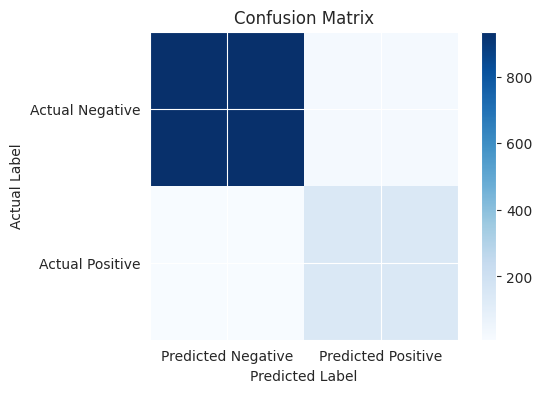


Here's confusion matrix: 
                 Predicted Negative  Predicted Positive
Actual Negative                 935                  23
Actual Positive                  10                 147


In [ ]:
conf_matrix = np.array([[trueNegative, falsePositive], [falseNegative, truePositive]])
df= pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

print()
print("Here's confusion matrix: ")
print(df)

In [ ]:
totalPredictions = truePositive + trueNegative + falsePositive + falseNegative
precision = truePositive / (truePositive + falsePositive)
accuracy = (truePositive + trueNegative) / totalPredictions
recall = truePositive / (truePositive + falseNegative)
f1_score = 2 * (precision * recall) / (precision + recall)

In [ ]:
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Precision: 0.8647
Accuracy: 0.9704
Recall (Sensitivity): 0.9363
F1-Score: 0.8991


In [ ]:
print('The model was : ',round(accuracy*100,2),"% accurate")

The model was :  97.04 % accurate
